In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_iris, fetch_mldata

import renom as rm
from renom.optimizer import Adam
from renom.cuda import set_cuda_active
set_cuda_active(False)

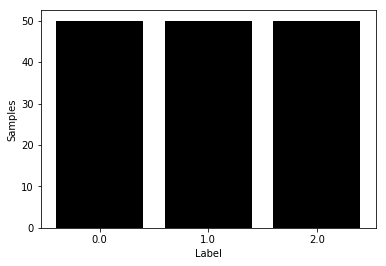

In [11]:
iris = load_iris()
X = iris.data
y = iris.target

X = X.astype(np.float32)
y = y.astype(np.float32)

left = []
height = []
label = []
uniq_label = list(set(y))
for i in range(0, len(uniq_label)):
    label.append(uniq_label[i])
    left.append(uniq_label[i])
    height.append(len(y[y==uniq_label[i]]))
plt.bar(left, height, color="black", tick_label=label, align="center")
plt.xlabel("Label")
plt.ylabel("Samples")
plt.show()

In [12]:
lb = LabelBinarizer().fit(y)
N = len(X)
class AutoEncoder(rm.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        # 入力層：4ニューロン
        # 中間層：2ニューロン
        self.layer1 = rm.Dense(2)
        # 出力層：4ニューロン
        self.layer2 = rm.Dense(4)

    def forward(self, X):
        t1 = self.layer1(X)
        out = self.layer2(t1)
        return out

    def predict(self, X, y):
        t1 = self.layer1(X)
        uniq_label = list(set(y))
        for i in range(0, len(uniq_label)):
            # 何を出力しているのだろうか
            plt.scatter(t1[y==uniq_label[i], :][:, 0], t1[y==uniq_label[i], :][:, 1], color=cm.get_cmap("tab20").colors[i], label=str(uniq_label[i]), alpha=0.5)
        plt.legend()
        plt.show()
        out = self.layer2(t1)
        return out

epoch  0 train_loss:57.198425
epoch  5 train_loss:55.136673
epoch 10 train_loss:53.165131
epoch 15 train_loss:51.294445
epoch 20 train_loss:49.518524
epoch 25 train_loss:47.828598
epoch 30 train_loss:46.215866
epoch 35 train_loss:44.671860
epoch 40 train_loss:43.188477
epoch 45 train_loss:41.758190
epoch 50 train_loss:40.374138
epoch 55 train_loss:39.030251
epoch 60 train_loss:37.721230
epoch 65 train_loss:36.442574
epoch 70 train_loss:35.190533
epoch 75 train_loss:33.962059
epoch 80 train_loss:32.754761
epoch 85 train_loss:31.566856
epoch 90 train_loss:30.397076
epoch 95 train_loss:29.244621


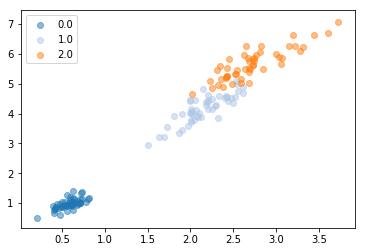

In [13]:
model = AutoEncoder()
optimizer = Adam()

batch = 64
epoch = 100
for i in range(epoch):
    for j in range(N//batch):
        train_batch = X[j*batch : (j+1)*batch]
        with model.train():
            z = model.forward(train_batch)
            # 損失関数は平均二乗誤差            
            loss = rm.mse(z, train_batch)
        loss.grad().update(optimizer)
    if i%5 == 0:
        print("epoch %2d train_loss:%f" % (i, loss))

pred = model.predict(X, y)

epoch  0 train_loss:33.971573
epoch  5 train_loss:32.478085
epoch 10 train_loss:31.054663
epoch 15 train_loss:29.712173
epoch 20 train_loss:28.443321
epoch 25 train_loss:27.236017
epoch 30 train_loss:26.077152
epoch 35 train_loss:24.954702
epoch 40 train_loss:23.858809
epoch 45 train_loss:22.782150
epoch 50 train_loss:21.719913
epoch 55 train_loss:20.669533
epoch 60 train_loss:19.630314
epoch 65 train_loss:18.603018
epoch 70 train_loss:17.589470
epoch 75 train_loss:16.592199
epoch 80 train_loss:15.614140
epoch 85 train_loss:14.658398
epoch 90 train_loss:13.728049
epoch 95 train_loss:12.826004


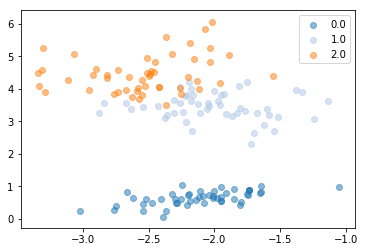

In [14]:
model = AutoEncoder()
optimizer = Adam()

batch = 64
epoch = 100
for i in range(epoch):
    for j in range(N//batch):
        train_batch = X[j*batch : (j+1)*batch]
        with model.train():
            z = model.forward(train_batch)
            loss = rm.mse(z, train_batch)
        loss.grad().update(optimizer)
    if i%5 == 0:
        print("epoch %2d train_loss:%f" % (i, loss))

pred = model.predict(X, y)

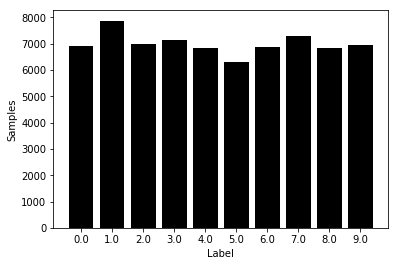

In [18]:
mnist = fetch_mldata("MNIST original", data_home=".")
X = mnist.data / 255
y = mnist.target

X = X.astype(np.float32)
y = y.astype(np.float32)

left = []
height = []
label = []
uniq_label = list(set(y))
for i in range(0, len(uniq_label)):
    label.append(uniq_label[i])
    left.append(uniq_label[i])
    height.append(len(y[y==uniq_label[i]]))
plt.clf()
plt.bar(left, height, color="black", tick_label=label, align="center")
plt.xlabel("Label")
plt.ylabel("Samples")
plt.show()

In [19]:
lb = LabelBinarizer().fit(y)
N = len(X)
class AutoEncoder(rm.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        # 入力層：784ニューロン
        # 中間層：2ニューロン
        self.layer1 = rm.Dense(400)
        # 出力層：784ニューロン
        self.layer2 = rm.Dense(784)

    def forward(self, X):
        t1 = self.layer1(X)
        out = self.layer2(t1)
        return out

    def predict(self, X, y):
        t1 = self.layer1(X)
        uniq_label = list(set(y))
        for i in range(0, len(uniq_label)):
            # 何を出力しているのだろうか
            plt.scatter(t1[y==uniq_label[i], :][:, 0], t1[y==uniq_label[i], :][:, 1], color=cm.get_cmap("tab20").colors[i], label=str(uniq_label[i]), alpha=0.5)
        plt.legend()
        plt.show()
        out = self.layer2(t1)
        return out

epoch  0 train_loss:0.695450
epoch  5 train_loss:0.371326
epoch 10 train_loss:0.326026
epoch 15 train_loss:0.240775
epoch 20 train_loss:0.191689
epoch 25 train_loss:0.238155
epoch 30 train_loss:0.246689
epoch 35 train_loss:0.121477
epoch 40 train_loss:0.225393
epoch 45 train_loss:0.214832
epoch 50 train_loss:0.214746
epoch 55 train_loss:0.255932
epoch 60 train_loss:0.236993
epoch 65 train_loss:0.245549
epoch 70 train_loss:0.213145
epoch 75 train_loss:0.240450
epoch 80 train_loss:0.199195
epoch 85 train_loss:0.107727
epoch 90 train_loss:0.208325
epoch 95 train_loss:0.180550


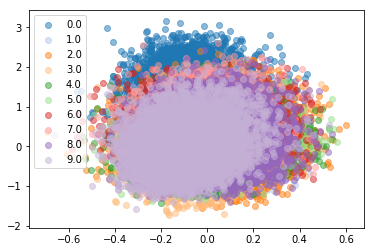

In [20]:
model = AutoEncoder()
optimizer = Adam()

batch = 64
epoch = 100
for i in range(epoch):
    for j in range(N//batch):
        train_batch = X[j*batch : (j+1)*batch]
        with model.train():
            z = model.forward(train_batch)
            # 損失関数は平均二乗誤差
            loss = rm.mse(z, train_batch)
        loss.grad().update(optimizer)
    if i%5 == 0:
        print("epoch %2d train_loss:%f" % (i, loss))

pred = model.predict(X, y)